In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy
import cartopy.crs as ccrs
import lightningutil

# Information

In [2]:
#files 

"""
metfields

/aosc/eos20/djallen/lightning/geos/twod/201907

GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc       *       
GEOS_l_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *
GEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc   *
GEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N.nc       *
GEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *
GEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N.nc     *
GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc     *
GEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N.nc     *
GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N.nc      *
GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *

/aosc/eos20/djallen/lightning/geos/twod_440/201907

GEOS_cldfrac_conv_440_hrly.UT.t201907.r180W-30W_50S-50N.nc   *
GEOS_cldfrac_ls_440_hrly.UT.t201907.r180W-30W_50S-50N.nc     *
GEOS_cnv_mfc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc        *
GEOS_iwc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc            *

lightning

/aosc/eos20/djallen/data/lightning/glm/2019

GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
"""
print()

In [3]:
# open files
# CAPE (hourly) and Lightning Flashs and Groups

directory = '/aosc/eos20/djallen/lightning/geos/twod/201907/'
filename = 'GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc'
ds_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

directory = '/aosc/eos20/djallen/data/lightning/glm/2019/'
filename = 'GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS1_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

filename = 'GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS2_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

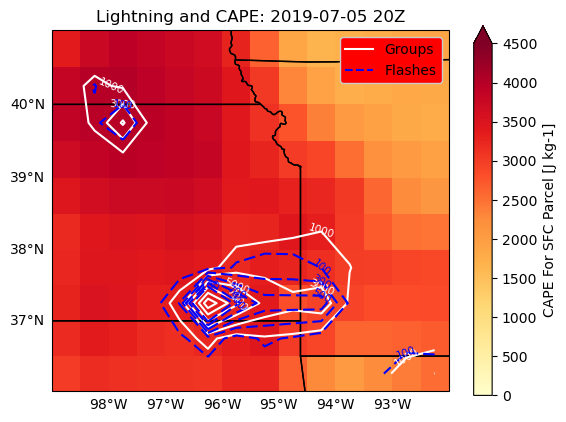

In [4]:
lightningutil.case_study_plotting(
    ds_tmp,
    CS1_tmp,
    CS2_tmp,
    lon_range=slice(-99,-92),
    lat_range=slice(36,41),  
    date_time='2019-07-05T20:00:00.000000000',
    vmin=0,
    vmax=4500,
    cmap='YlOrRd',
    cnt_levels_1=[1000,3000,5000,7000,9000,11000], 
    color_1='white',
    legend_label_1="Groups",
    cnt_levels_2=[100,300,500,700,900,1100],
    color_2='blue',
    legend_label_2="Flashes",
    cbar_label="CAPE For SFC Parcel [J kg-1]",
    legend_facecolor='red',
    fig_title='Lightning and CAPE: 2019-07-05 20Z',
                   )

# CAPE // Flashes and Group Counts

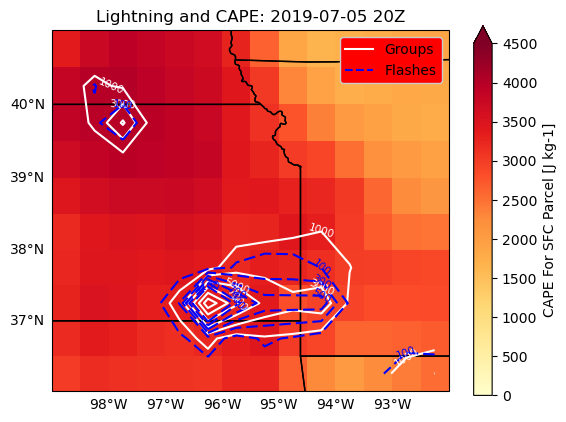

In [22]:
case_study_plotting(ds_tmp,
                    CS1_tmp,
                    CS2_tmp,
                    lon_range=slice(-99,-92),
                    lat_range=slice(36,41),  
                    date_time='2019-07-05T20:00:00.000000000',
                    vmin=0,
                    vmax=4500,
                    cmap='YlOrRd',
                    cnt_levels_1=[1000,3000,5000,7000,9000,11000], 
                    color_1='white',
                    legend_label_1="Groups",
                    cnt_levels_2=[100,300,500,700,900,1100],
                    color_2='blue',
                    legend_label_2="Flashes",
                    cbar_label="CAPE For SFC Parcel [J kg-1]",
                    legend_facecolor='red',
                    fig_title='Lightning and CAPE: 2019-07-05 20Z',
                    save_string=None
                   )

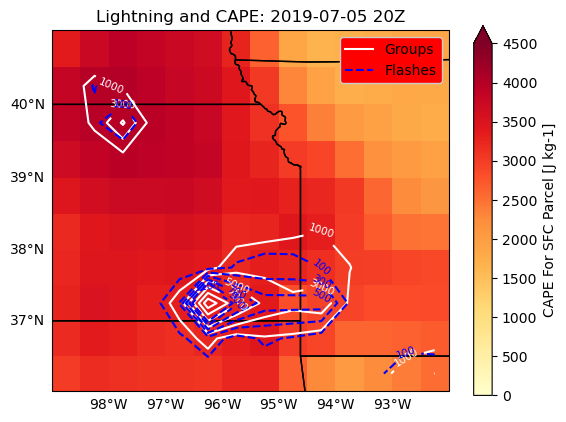

In [19]:
# figure creation
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

# plotting
ds = ds_tmp.sel(
    Latitudes=slice(36,41),
    Longitudes=slice(-99,-92),
    Datetime='2019-07-05T20:00:00.000000000',
)

PC = axis.pcolormesh(
    ds.Longitudes, ds.Latitudes, ds.data, vmin=0, vmax=4500, cmap='YlOrRd', transform=ccrs.PlateCarree(),
)

gridlines()

plt.colorbar(PC, ax=axis, extend='max', label="CAPE For SFC Parcel [J kg-1]")

# plotting the group flashes
CS = CS1_tmp.sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(
    CS.Longitudes, CS.Latitudes, CS.data, 
    levels=[1000,3000,5000,7000,9000,11000], 
    colors='white', transform=ccrs.PlateCarree(),
)

# labeling the contour
axis.clabel(cs, fontsize=7.5) 

# plotting the individual flashes
CS = CS2_tmp.sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='red')

axis.set_title('Lightning and CAPE: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# CAPE // Optimal Energy

In [ ]:
#CAPE (hourly) and Optimal Energies

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the cape 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['cape'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, vmin=0, vmax=4500, cmap='YlOrRd', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False 
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CAPE For SFC Parcel [J kg-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='red')

axis.set_title('Energy and CAPE: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# PRECON // Flashes and Groups Count

In [ ]:
#convective precip (hourly) and Lightning Flashes and Groups 

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the cape 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['precon'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, vmin=0, vmax=0.00025, 
                cmap='cool', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Conv.Precip [kg m-2 s-1]")


#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and Conv. Precip: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()


# PRECON // Optical Energy

In [ ]:
#Conv. Precip and Optimal Energies

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the cape 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['precon'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, vmin=0, vmax=0.00025, 
                cmap='cool', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Conv.Precip [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and Conv. Precip: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# PRETOT // Flashes and Groups Count



In [ ]:
#total precip and lightning group/flash counts

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the total precip 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['pretot'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.000250, 
                cmap='summer', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Total Precip [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and Total Precip: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()


# PRETOT // Optical Energy

In [ ]:
#total precip and lightning group/flash optimal energy

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the total precip 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['pretot'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T19:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.000250, 
                cmap='summer', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Total Precip [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T19:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T2:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and Total Precip: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# 440 IWC // Flashes and Groups Count

In [ ]:
#440 ice water content and lightning flash/group counts 

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the iwc 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_iwc_440_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['iwc_440'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.000005, 
                cmap='winter', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Ice Water Content 440 hPa [kg m-3]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and IWC-440 hPa: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# 440 IWC // Optical Energy

In [ ]:
#ice water content at  440hpa and optical energy 

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the iwc 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_iwc_440_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['iwc_440'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.000005, 
                cmap='winter', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Ice Water Content 440 hPa [kg m-3]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and IWC-440 hPa: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# PBL // Flashes and Groups Count

In [ ]:
#PBL Height and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['pblh'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=2, 
                cmap='tab20b', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="PBL Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and PBL Height: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()


# PBL // Optical Energy

In [ ]:
#PBL Height and optical energy 

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the iwc 
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['pblh'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=2, 
                cmap='tab20b', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="PBL Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and PBL Height: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Conv CTOP Pressure // Flashes and Group Counts

In [ ]:
#Convective Cloud top Pressure (Hpa) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['p_ctop'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=150, vmax=500, 
                cmap='binary', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CTOP Pressure [hPa]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='Orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and CTOP Pressure: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()


# Conv CTOP Pressure // Optical Energy

In [ ]:
#Convective Cloud top Pressure (Hpa) and energy

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['p_ctop'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=150, vmax=500, 
                cmap='binary', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CTOP Pressure [hPa]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and CTOP Pressure: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Conv CBASE Pressure // Flash and Group Counts

In [ ]:
#Convective Cloud base Pressure (Hpa) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['p_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=900, vmax=960, 
                cmap='PuRd_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CBASE Pressure [hPa]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='green', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='green', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and CBASE Pressure: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Conv CBASE Pressure // Optical Energy

In [ ]:
#Convective Cloud base Pressure (Hpa) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['p_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=900, vmax=960, 
                cmap='PuRd_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CBASE Pressure [hPa]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='green', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='blue', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='green', linestyle='-'),
    Line2D([0], [0], color='blue', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and CBASE Pressure: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cloud Base Mass Flux // Flash and Counts

In [ ]:
#Convective Cloud base mass flux (kg m-2 s-1) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['mf_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.05, 
                cmap='ocean_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CBASE Mass Flux [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and CBASE Mass Flux: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# CBase Mass Flux // Optical Energy

In [ ]:
#Convective Cloud base mass flux (kg m-2 s-1) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['mf_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.05, 
                cmap='ocean_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="CBASE Mass Flux [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and CBASE Mass Flux: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cumulative mass flux at 440 hpa // Flash and Group Counts

In [ ]:
#440 cumulative mass flux (kg m-2 s-1) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cnv_mfc_440_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['cnv_mfc_440'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.05, 
                cmap='ocean_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="440 Cum. Mass Flux [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and 440 Mass Flux: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cumulative Mass Flux at 440 hPa // Optical Energy

In [ ]:
#440 cumulative mass flux (kg m-2 s-1) and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cnv_mfc_440_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['cnv_mfc_440'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0, vmax=0.05, 
                cmap='ocean_r', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="440 Cum. Mass Flux [kg m-2 s-1]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and 440 Mass Flux: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cloud Base Heights // Flash and Group Counts

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

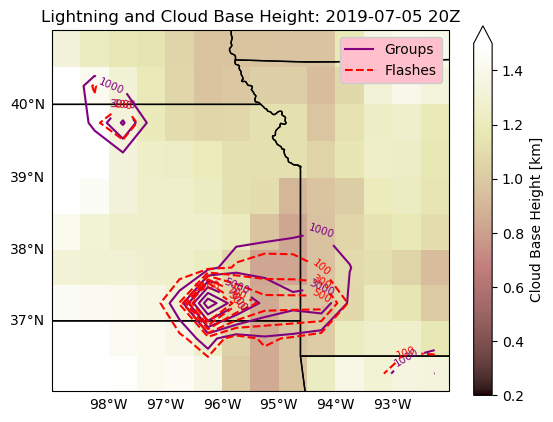

In [43]:
#cloud base heights (z) in km and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['z_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0.2, vmax=1.5, 
                cmap='pink', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Cloud Base Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='purple', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='purple', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and Cloud Base Height: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cloud Base Heights // Optical Energy 

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

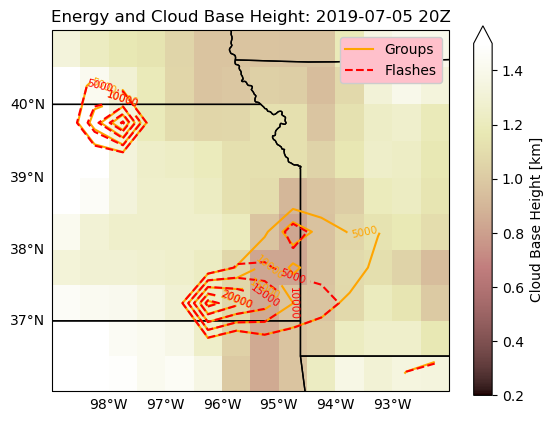

In [52]:
#cloud base heights (z) in km and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['z_cbase'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=0.2, vmax=1.5, 
                cmap='pink', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Cloud Base Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='orange', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='orange', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and Cloud Base Height: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cloud top height in km // flash and group counts

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

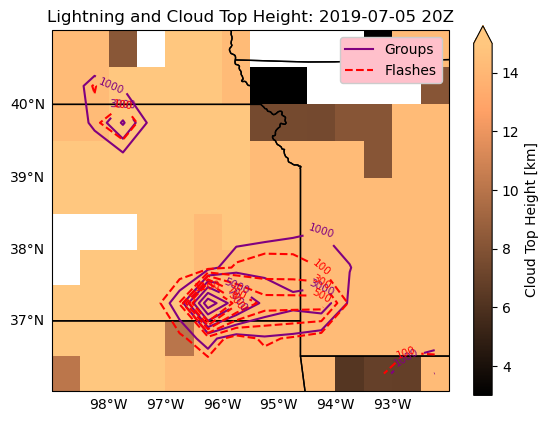

In [23]:
#cloud top heights (z) in km and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['cldht'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=3, vmax=15, 
                cmap='copper', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Cloud Top Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='purple', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T20:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='purple', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and Cloud Top Height: 2019-07-05 20Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Cloud Top Height [km] // Energy 

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

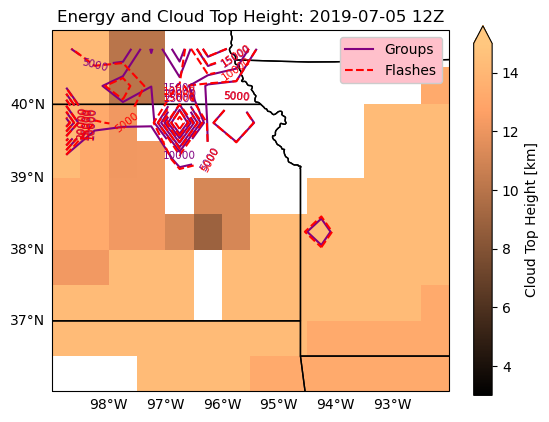

In [32]:
#cloud top heights (z) in km and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['cldht'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=3, vmax=15, 
                cmap='copper', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Cloud Top Height [km]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='purple', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='purple', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and Cloud Top Height: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Surface Temp // Flash and Group Count

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

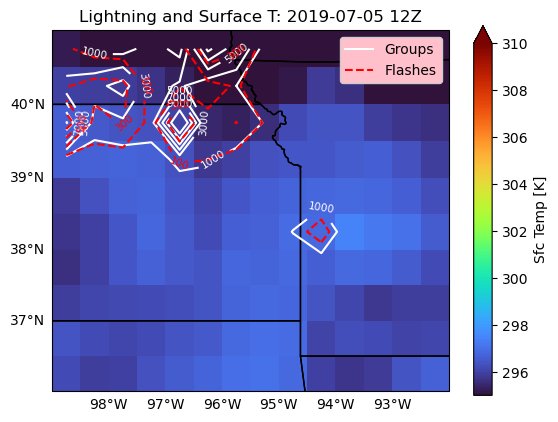

In [50]:
#Sfc Temp and flashes/groups

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['t_sfc'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=295, vmax=310, 
                cmap='turbo', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Sfc Temp [K]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['groups'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, levels=[1000,3000,5000,7000,9000,11000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['flashes'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[100,300,500,700,900,1100],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Lightning and Surface T: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Surface Temp // Optical Energy

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is dep

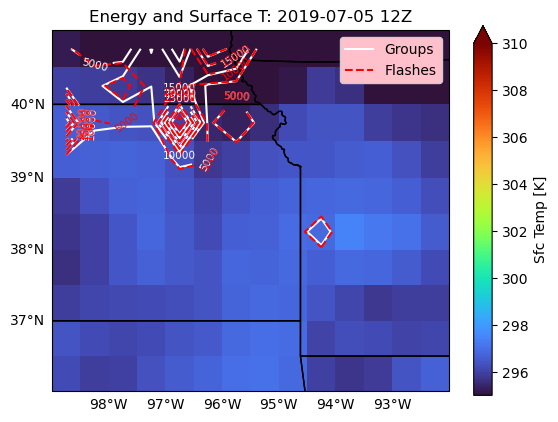

In [52]:
#Sfc Temp and energy

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['t_sfc'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=295, vmax=310, 
                cmap='turbo', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Sfc Temp [K]")

#plotting the group flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_g'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs  = axis.contour(CS.Longitudes, CS.Latitudes, 
                   CS.data, 
                   levels=[5000,10000,15000,20000,25000,30000,35000], 
                   colors='white', transform=ccrs.PlateCarree(),)

axis.clabel(cs, fontsize=7.5) #labeling the contour

#plotting the individual flashes
CS = xr.open_dataset( 
    '/aosc/eos20/eevans15/GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['energy_f'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)

cs = axis.contour(CS.Longitudes, CS.Latitudes, 
                  CS.data, 
                  levels=[5000,10000,15000,20000,25000,30000,35000],
                  colors='red', linestyles="dashed", transform=ccrs.PlateCarree(),)
axis.clabel(cs,inline=True,fontsize=7.5)  #these plot on top of each other though, how do i remove?

#https://matplotlib.org/stable/gallery/images_contours_and_fields/
#contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='white', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
               ]
axis.legend(custom_lines, ['Groups', 'Flashes'], framealpha=1., facecolor='pink')

axis.set_title('Energy and Surface T: 2019-07-05 12Z')
axis.coastlines()
axis.add_feature(cartopy.feature.STATES)
#plt.savefig(fname="/Users/erinevans/Desktop/test.png", dpi=200)
plt.show()

# Conv. Cloud Area Fraction // Flash and Group Count

KeyError: 't_sfc'

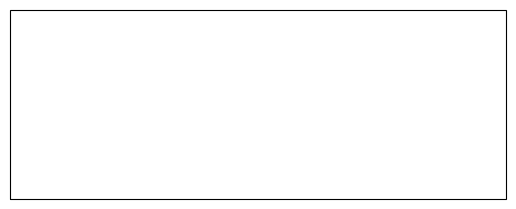

In [55]:
#conv cloud area frac and counts

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(-90, 30)))

#plotting the variable
ds = xr.open_dataset(
    '/aosc/eos20/eevans15/GEOS_cldfrac_conv_440_hrly.UT.t201907.r180W-30W_50S-50N_v2.nc'
)['t_sfc'].sel(
    Latitudes=slice(36,41),Longitudes=slice(-99,-92),Datetime='2019-07-05T12:00:00.000000000',
)


PC = axis.pcolormesh(ds.Longitudes, ds.Latitudes, ds.data, 
                vmin=295, vmax=310, 
                cmap='turbo', 
                transform=ccrs.PlateCarree(),)

gridliner = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = False  
gridliner.xlines = False

plt.colorbar(PC, ax=axis, extend='max', label="Sfc Temp [K]")

# Conv. Cloud Area Fraction // Optical Energy

# Large Scale Cloud Area Frac // Flash and Group Count

# Large Scale Cloud Area Frac // Optical Energy